# SentimentScope: Sentiment Analysis using Transformers!
## Introduction <a name = "introduction"></a>

In this notebook, you will train a transformer model from scratch to perform sentiment analysis on the IMDB dataset. You are a Machine Learning Engineer at Cinescope, a growing entertainment company working to enhance its recommendation system. Your task is to fine-tune a transformer-based model for sentiment analysis using the IMDB dataset. By classifying reviews as positive or negative, you will help the company better understand user sentiment and deliver more personalized experiences.

By completing this project, you will demonstrate your competency in the following learning objectives:

- Load, explore, and prepare a text dataset for training a transformer model using PyTorch.
- Customize the architecture of the transformer model for a classification task.
- Train and test a transformer model on the IMDB dataset.

Now that you have an overview of what you will achieve in this project, let’s move on to the project outline.

---

### Project Outline

This notebook is organized into the following sections:


1. [Introduction](#introduction): Overview of the project, learning objectives, and understanding sentiment analysis.
2. [Load, Explore, and Prepare the Dataset](#load-explore-and-prepare-the-dataset): Load the IMDB dataset, explore it with visualizations, and split it into training and validation sets.
3. [Implement a DataLoader in PyTorch](#implement-a-dataloader-in-pytorch): Create the `IMDBDataset` class and use it with the PyTorch `DataLoader`, including tokenization.
4. [Customize the Transformer Architecture](#customize-the-transformer-architecture): Modify the transformer model for binary classification.
5. [Implement Accuracy Calculation Method](#implement-accuracy-calculation-method): Create a function to compute accuracy for monitoring performance.
6. [Train the Model](#train-the-model): Complete and execute the training loop for binary classification.
7. [Test the Model](#test-the-model): Evaluate the model on the test dataset and ensure it achieves over 75% accuracy.
8. [Conclusion](#conclusion): Summarize the project results and key takeaways.

Click on the section titles above to navigate directly to the corresponding part of the notebook!

---

Now that we've outlined the structure and objectives of this project, let's delve into the core concept: sentiment analysis.

### Understanding Sentiment Analysis

Sentiment analysis is a natural language processing (NLP) technique used to determine the sentiment expressed in a piece of text. This can range from identifying the polarity (positive, negative, or neutral) of a review to analyzing emotions and opinions.

In this project, sentiment analysis is explicitly framed as a **binary classification task**, where the goal is to determine whether a given movie review is *positive* or *negative*. This task is central to many real-world applications, including customer feedback analysis, social media monitoring, and recommendation systems. By developing a transformer-based model, you will classify IMDB movie reviews as positive or negative to tackle the challenge faced by your entertainment company CineScope by enhancing its recommendation system, enabling more accurate and personalized suggestions. 

Reviews labeled as positive will be marked as 1 in the dataset, while negative reviews will be labeled as 0.

For example, consider the following movie review:

> "The movie was a rollercoaster of emotions, and I loved every moment of it!"

This review is clearly positive as it expresses enjoyment and satisfaction with the movie, hence it will be labelled as *positive* or 1 in the dataset. In contrast:

> "The plot was predictable, and the acting was subpar. A waste of time."

This review conveys a negative sentiment, criticizing both the plot and acting, hence it will be labelled as *negative* or 0 in the dataset.

While transformers are often used for generation tasks, they can also be adapted for classification tasks with some modifications to their architecture. You might already be familiar with the tweaks that we will implement in this project.


---

### Data Description

The dataset used in this project is the [IMDB dataset](https://ai.stanford.edu/~amaas/data/sentiment/), provided in the `aclIMDB_v1.tar.gz` file. Upon extracting the file, you will find the following folder structure:

```
aclIMDB/
├── train/
│   ├── pos/    # Positive reviews for training
│   ├── neg/    # Negative reviews for training
│   ├── unsup/  # Unsupervised data (not used in this project)
├── test/
│   ├── pos/    # Positive reviews for testing
│   ├── neg/    # Negative reviews for testing
```

- **train/**: Contains labeled data for training the model. Reviews in the `pos/` folder should be labeled as positive (1), while reviews in the `neg/` folder should be labeled as negative (0).
- **test/**: Contains labeled data for evaluating the model. Similar to the training data, `pos/` and `neg/` contain positive and negative reviews, respectively.
- **unsup/**: Contains unlabeled reviews that are not used in this project.

Understanding the folder structure is crucial as it guides how we load and preprocess the data for the sentiment classification task.

---


## <a name="load-explore-and-prepare-the-dataset"></a>Load, Explore, and Prepare the Dataset

### 1. Load the Dataset
The dataset is already available in the environment as `aclIMDB_v1.tar.gz`. We will load it into Pandas DataFrames for easy exploration and preparation.


In [59]:
import os
import pandas as pd

In [60]:
# Unpack the dataset - uncomment the line below to run
!tar -xzf aclImdb_v1.tar.gz

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


You have successfully extracted the folder. Go back to your workspace and explore the folder structure and find the relative paths for each of the following:
- Training positive reviews
- Training negative reviews
- Testing positive reviews
- Testing negative reviews

Assign the paths of these folders relative to the starter file in the variables below.


In [61]:
# Define paths to dataset
train_pos_path = 'aclImdb/train/pos'
train_neg_path = 'aclImdb/train/neg'
test_pos_path = 'aclImdb/test/pos'
test_neg_path = 'aclImdb/test/neg'

Now, you will implement the `load_dataset()` function, which reads all text files in a specified folder and returns their content as a list of strings. This function is essential for loading and preprocessing the dataset in subsequent steps.

To implement this function:

1. **Use the `os` module**: Leverage Python's `os` module to list all files in the folder.
2. **Handle file paths**: Use `os.path.join()` to construct full paths for files, ensuring compatibility across operating systems.
3. **Read file content**: Open each file in read mode (`'r'`) using UTF-8 encoding to handle text properly.
4. **Aggregate results**: Append the content of each file to a list and return it.

### Key Points to Consider:
- Ensure that the function only processes text files (you may use file extensions for filtering if needed).
- Refer to the [os.listdir documentation](https://docs.python.org/3/library/os.html#os.listdir) for listing files in a directory.


In [62]:
import os

def load_dataset(folder):
    """
    Reads all text files in the specified folder and returns their content as a list.

    Args:
        folder (str): Path to the folder containing text files.

    Returns:
        list: A list of strings, where each string is the content of a text file.
    """
    reviews = []
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        # Check if the path points to a file to avoid errors with subdirectories
        if os.path.isfile(filepath):
            with open(filepath, 'r', encoding='utf-8') as f:
                reviews.append(f.read())
    return reviews

Use the function now to load the training and testing data:

In [63]:
# Load training and testing data
train_pos = load_dataset(train_pos_path)
train_neg = load_dataset(train_neg_path)
test_pos = load_dataset(test_pos_path)
test_neg = load_dataset(test_neg_path)

# You can now check the number of reviews loaded
print(f"Number of positive training reviews: {len(train_pos)}")
print(f"Number of negative training reviews: {len(train_neg)}")
print(f"Number of positive testing reviews: {len(test_pos)}")
print(f"Number of negative testing reviews: {len(test_neg)}")

Number of positive training reviews: 12500
Number of negative training reviews: 12500
Number of positive testing reviews: 12500
Number of negative testing reviews: 12500


We can convert the data into pandas dataframes to make handling the datasets easier.

In [64]:
# Create DataFrames
train_df = pd.DataFrame({
    'review': train_pos + train_neg,
    'label': [1] * len(train_pos) + [0] * len(train_neg)
})

test_df = pd.DataFrame({
    'review': test_pos + test_neg,
    'label': [1] * len(test_pos) + [0] * len(test_neg)
})

print(train_df.head())

                                              review  label
0  I never thought an old cartoon would bring tea...      1
1  'Where the Sidewalk Ends (1950)' opens, approp...      1
2  I really like this movie because in Australia,...      1
3  The Ogre is a film made for TV in Italy and wa...      1
4  What a good film! Made Men is a great action m...      1


You can ensure that your datasets have loaded correctly by running the following code cell. No output means success!

In [65]:
# Assert that both datasets have the expected number of rows
assert train_df.shape[0] == 25000, "Training dataset does not have 25000 rows."
assert test_df.shape[0] == 25000, "Testing dataset does not have 25000 rows."

# Assert that both datasets have exactly two columns
assert train_df.shape[1] == 2, "Training dataset does not have exactly 2 columns."
assert test_df.shape[1] == 2, "Testing dataset does not have exactly 2 columns."


### 2. Explore the Dataset
Exploration helps us understand the dataset's structure and distribution.

Here are some suggestions for exploration and visualizations:
- **Dataset Overview**: Use `DataFrame.info()` and `DataFrame.describe()` to understand the dataset structure and basic statistics.
- **Label Distribution**: Create bar charts to visualize the number of positive and negative reviews.
- **Review Length Analysis**: Compute and plot the distribution of review lengths (e.g., number of characters or words).
- **Sample Reviews**: Print a few positive and negative reviews to understand the text content.

Write code to explore the dataset in this section.

In [66]:
# Dataset Overview
print("--- Training Dataset Overview ---")
print(train_df.info())
print("\n--- Training Dataset Statistics ---")
print(train_df.describe(include='all'))

print("\n--- Testing Dataset Overview ---")
print(test_df.info())
print("\n--- Testing Dataset Statistics ---")
print(test_df.describe(include='all'))

--- Training Dataset Overview ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  25000 non-null  object
 1   label   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB
None

--- Training Dataset Statistics ---
                                                   review        label
count                                               25000  25000.00000
unique                                              24904          NaN
top     When i got this movie free from my job, along ...          NaN
freq                                                    3          NaN
mean                                                  NaN      0.50000
std                                                   NaN      0.50001
min                                                   NaN      0.00000
25%                                                 

Training set label distribution:
 label
1    12500
0    12500
Name: count, dtype: int64

Testing set label distribution:
 label
1    12500
0    12500
Name: count, dtype: int64


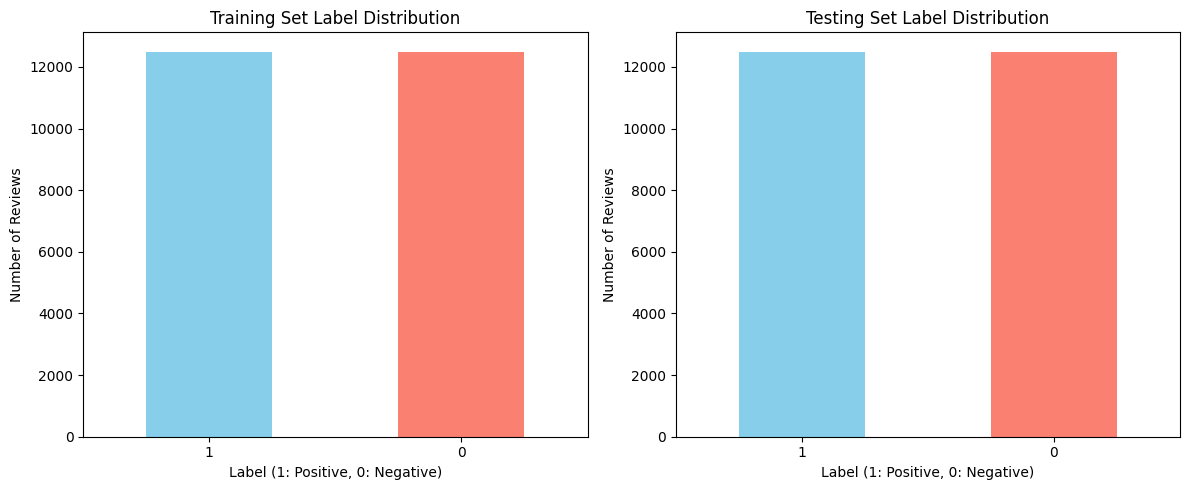

In [67]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt

# Label Distribution
train_label_counts = train_df['label'].value_counts()
test_label_counts = test_df['label'].value_counts()

print("Training set label distribution:\n", train_label_counts)
print("\nTesting set label distribution:\n", test_label_counts)

# Plotting the label distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot for the training set
train_label_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'salmon'])
axes[0].set_title('Training Set Label Distribution')
axes[0].set_xlabel('Label (1: Positive, 0: Negative)')
axes[0].set_ylabel('Number of Reviews')
axes[0].tick_params(axis='x', rotation=0)

# Plot for the testing set
test_label_counts.plot(kind='bar', ax=axes[1], color=['skyblue', 'salmon'])
axes[1].set_title('Testing Set Label Distribution')
axes[1].set_xlabel('Label (1: Positive, 0: Negative)')
axes[1].set_ylabel('Number of Reviews')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

Training set review length statistics:
count    25000.00000
mean      1325.06964
std       1003.13367
min         52.00000
25%        702.00000
50%        979.00000
75%       1614.00000
max      13704.00000
Name: review_length, dtype: float64

Testing set review length statistics:
count    25000.00000
mean      1293.79240
std        975.90776
min         32.00000
25%        696.00000
50%        962.00000
75%       1572.00000
max      12988.00000
Name: review_length, dtype: float64


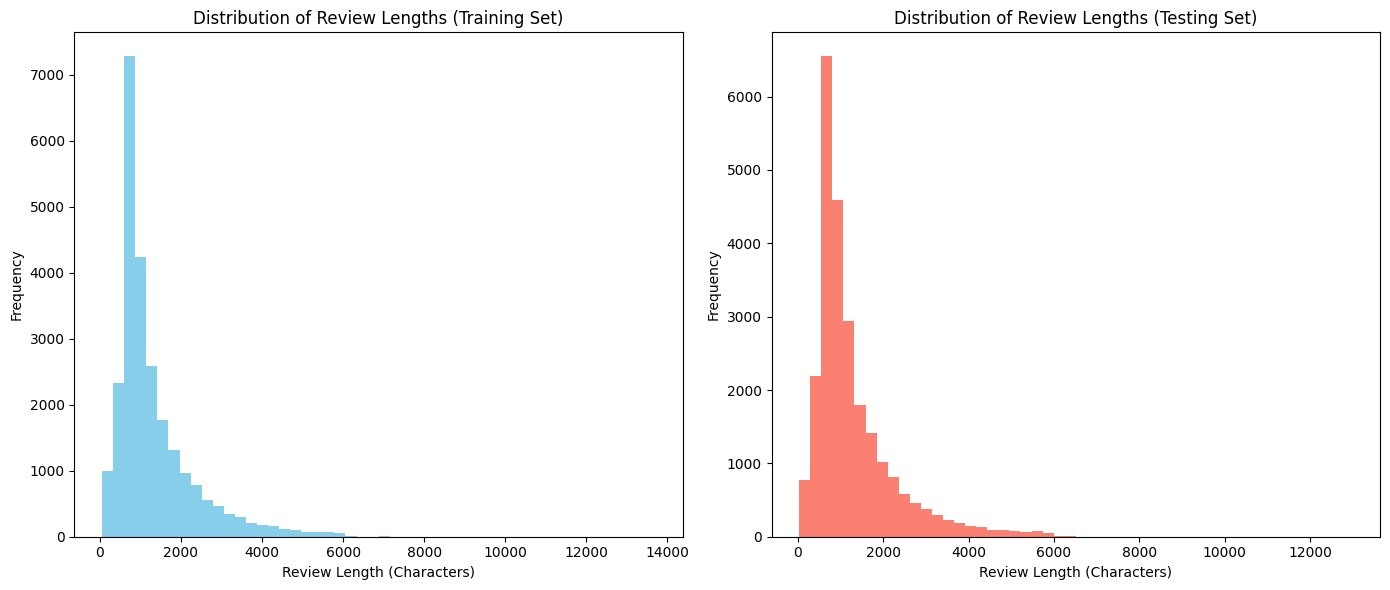

In [68]:
# Review Length Analysis
train_df['review_length'] = train_df['review'].apply(len)
test_df['review_length'] = test_df['review'].apply(len)

print("Training set review length statistics:")
print(train_df['review_length'].describe())

print("\nTesting set review length statistics:")
print(test_df['review_length'].describe())

# Plotting the review length distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

train_df['review_length'].plot(kind='hist', bins=50, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Review Lengths (Training Set)')
axes[0].set_xlabel('Review Length (Characters)')
axes[0].set_ylabel('Frequency')

test_df['review_length'].plot(kind='hist', bins=50, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Review Lengths (Testing Set)')
axes[1].set_xlabel('Review Length (Characters)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [69]:
# Sample Reviews
print("--- Sample Reviews ---")

# Print a positive review
positive_review_sample = train_df[train_df['label'] == 1].sample(1)['review'].iloc[0]
print("\nSample Positive Review:")
print("-" * 50)
print(positive_review_sample)
print("-" * 50)

# Print a negative review
negative_review_sample = train_df[train_df['label'] == 0].sample(1)['review'].iloc[0]
print("\nSample Negative Review:")
print("-" * 50)
print(negative_review_sample)
print("-" * 50)

--- Sample Reviews ---

Sample Positive Review:
--------------------------------------------------
This is a film that on the surface would seem to be all about J.Edgar Hoover giving himself a a big pat on the back for fighting Klansmen,going after Indian killers, hunting the famous gangsters of the 1930's, fighting Nazi's in the US and South America during world war 2 and Commies in New York during the early 1950's. Of course in 1959 we did not know about Mr. Hoover's obsession for keeping secret files on honest Americans, bugging people like the Rev. Martin Luther King, Jr, but worst of all,his secret love affair with his deputy director,Clyde Tolson( If you want to know more about that subject, I suggest seeing the film Citizen Cohn). Hoover aside, This story of a life in the FBI as told by Jimmy Stewart makes for a decent, but dated film. Vera Miles as his devoted wife is also good. But Jimmy is the movie. As much as Hoover controlled production and always made sure the FBI was see

### 3. Prepare the Dataset
We will split the training data further into training and validation subsets. The way we constructed the dataset, reviews with positive and negative labels are segregated. To ensure that the validation dataset works well, we first need to shuffle the dataset.


In [70]:
# Split train data into training and validation sets manually
train_size = int(0.9 * len(train_df))
# Shuffle the dataset
shuffled_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
train_data = shuffled_df.iloc[:train_size]
val_data = shuffled_df.iloc[train_size:]

### 4. Testing the Tokenizer

#### Subword Tokenization
In earlier tasks, you might have encountered character-level tokenization, where each character in the text is treated as a token. While this is straightforward, it is less efficient and may result in larger input sizes, impacting the performance of transformer models.

To address this, we will use Hugging Face's `AutoTokenizer`, a robust and efficient class designed for tokenizing text based on pretrained models. Specifically, we will utilize the `bert-base-uncased` tokenizer, which applies **subword tokenization**. Subword tokenization involves two steps:

1. **Subword Splitting**: Words are split into smaller components (subwords) based on a predefined vocabulary. For example:
   - Input: "unhappiness"
   - Subword Splits: `['un', 'happiness']`

2. **Token Conversion**: Each subword is then converted into a numerical token ID. For example:
   - Subword Splits: `['un', 'happiness']`
   - Token IDs: `[1011, 24123]` (values are illustrative and depend on the tokenizer vocabulary).

#### About the `bert-base-uncased` Tokenizer
The `bert-base-uncased` tokenizer, developed by Google researchers, is part of the BERT model family. This tokenizer is associated with the `bert-base-uncased` model, which has been widely used for tasks such as sentiment analysis, question answering, and text classification. The tokenizer ensures all text is converted to lowercase and accents are removed, reducing vocabulary size and improving generalization. Example:

- Input: "I Love Transformers."
- Subword Splits: `['i', 'love', 'trans', '##formers', '.']`

You can learn more about the tokenizer and model on [Hugging Face's bert-base-uncased page](https://huggingface.co/bert-base-uncased).

#### Using the `AutoTokenizer` Class
The `AutoTokenizer` class in the Hugging Face Transformers library provides a seamless way to load tokenizers for various pretrained models. It automatically selects the correct tokenizer configuration based on the model name.


In [71]:
from transformers import AutoTokenizer

# Initialize tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

/opt/conda/lib/python3.10/site-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


This initializes a tokenizer tailored for the `bert-base-uncased` model. You can refer to the [Hugging Face AutoTokenizer documentation](https://huggingface.co/docs/transformers/main_classes/tokenizer) for more details. You can find the definition of the `from_pretrained()` method [here](https://huggingface.co/docs/transformers/v4.48.0/en/model_doc/auto#transformers.AutoTokenizer.from_pretrained).

Instead of tokenizing the entire dataset, we will test the tokenizer on a few sample reviews directly from the dataset:


In [72]:
# Take sample inputs from the dataset
sample_texts = train_data['review'].sample(3, random_state=42).tolist()

# Tokenize sample inputs
tokenized_samples = tokenizer(sample_texts, truncation=True, padding="max_length", max_length=128, return_tensors="pt")

In [73]:
print(tokenized_samples)

{'input_ids': tensor([[  101,  2023,  2038,  2000,  2022,  2028,  1997,  1996,  2190, 22092,
          2006,  1996,  2547,  2012,  1996,  2617,  1012,  2009,  3138,  1996,
          5699,  2100,  1011,  4086,  2801,  1997,  1037,  2265, 24135,  2105,
          1037,  2485,  2155,  1998,  4332,  2009,  2046,  1037,  3243, 12689,
          2664,  6057, 15921,  1997,  1037,  5171,  2155,  3143,  2007, 22941,
          1998,  6687, 14690,  2015,  1010, 28557,  3428,  1010,  2058,  1011,
          9474, 11397,  1998, 12170, 13344,  5208,  1012,  1045,  1005,  1049,
          2471,  4527,  2009,  1005,  1055,  6373,   999,  1026,  7987,  1013,
          1028,  1026,  7987,  1013,  1028,  2000,  2049,  4923,  1010,  1005,
          1022,  3722,  3513,  1005,  4282,  2009,  1005,  1055,  1037,  4038,
          1998,  2987,  1005,  1056,  3046,  2000,  2022,  2062,  1012,  2205,
          2116,  3065,  1006,  1041,  2290,  1010,  1005,  2905,  1010,  2905,
          1005,  1998,  1005, 15860, 2

Explanation of parameters:
 - `truncation=True`: Truncates text longer than the specified max_length.
 - `padding=True`: Pads shorter sequences to match max_length.
 - `max_length=128`: Specifies the maximum length of the sequences.
 - `return_tensors="pt"`: Returns PyTorch tensors as the output format.
 
For more details about truncation and padding, refer to the [Hugging Face Padding and Truncation Documentation](https://huggingface.co/docs/transformers/pad_truncation). This step ensures that the tokenizer works as expected and provides insight into its behavior. Next, we will use the tokenizer within the class definition to process the dataset.

---


# Implement a DataLoader in PyTorch<a id="implement-a-dataloader-in-pytorch"></a>


In this section, you will implement a custom dataset class and use it to create a DataLoader in PyTorch for feeding data into the model during training. PyTorch simplifies this process by providing the `Dataset` and `DataLoader` classes, which handle batching, shuffling, and preprocessing, allowing you to focus on the model architecture and training.

To start, we will create a custom dataset class for the IMDB dataset, which will process and return tokenized inputs along with their corresponding labels. This class will use a tokenizer to preprocess the raw text data.

### 1. Define a Custom Dataset Class

The custom dataset class will inherit from `torch.utils.data.Dataset` and include the following features:

1. **Initialization (`__init__`)**:
   - Accepts raw text and label data, along with a tokenizer and a maximum sequence length.
   - The tokenizer is used to preprocess the text data into tokenized inputs.
   - The maximum sequence length ensures that all tokenized inputs are of uniform length.

2. **Length (`__len__`)**:
   - Returns the total number of data samples in the dataset.

3. **Item Retrieval (`__getitem__`)**:
   - Retrieves a single data point by index.
   - Preprocesses the text using the tokenizer to create tokenized input IDs.
   - Returns the tokenized input IDs and the corresponding label for the given index.

You can refer to [this](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html) tutorial on the Pytorch website for more details.


In [74]:
import torch
from torch.utils.data import Dataset
MAX_LENGTH = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


**NOTE ABOUT GPU USAGE**

The workspace provides you with access to a GPU which is necessary for training a transformer model due to the efficiency provided by GPUs on the large amount of computations that are required. To ensure judicious usage of limited resources, please usage the GPU only when you are training the model. 

---
We will keep the maximum length of input to 128 tokens.

In [75]:
from torch.utils.data import Dataset
import torch

class IMDBDataset(Dataset):
    """
    A custom PyTorch Dataset for the IMDB dataset.

    This class preprocesses text data using a tokenizer and returns tokenized inputs
    along with their corresponding labels for sentiment analysis.

    Attributes:
        data (pd.DataFrame): A DataFrame containing text and label columns.
        tokenizer (transformers.PreTrainedTokenizer): The tokenizer used for preprocessing text.
        max_length (int): Maximum length for tokenized sequences.
    """
    def __init__(self, data, tokenizer, max_length=MAX_LENGTH):
        """
        Initialize the dataset.

        Args:
            data (pd.DataFrame): A DataFrame with columns `review` (text) and `label` (target).
            tokenizer (transformers.PreTrainedTokenizer): The tokenizer to preprocess the text.
            max_length (int, optional): Maximum token sequence length. Defaults to 128.
        """
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        """
        Return the total number of samples in the dataset.

        Returns:
            int: Number of samples.
        """
        return len(self.data)

    def __getitem__(self, idx):
        """
        Retrieve a single data point by index and preprocess it.

        Args:
            idx (int): Index of the data point to retrieve.

        Returns:
            torch.Tensor: Tokenized input IDs for the text.
            int: Label corresponding to the text.
        """
        review_text = self.data.iloc[idx]['review']
        label = self.data.iloc[idx]['label']

        # Tokenize the text using the specified tokenizer
        tokenized_output = self.tokenizer(
            review_text,
            truncation=True,
            padding="max_length",
            max_length=self.max_length,
            return_tensors="pt"
        )
        
        # Squeeze the tensor to remove the batch dimension (which is of size 1)
        input_ids = tokenized_output['input_ids'].squeeze()
        
        return input_ids, label

### 2. Initialize the Dataset

Once the `IMDBDataset` class is defined, we can initialize it directly with the training and validation DataFrames.

In [76]:
# Initialize the datasets
train_dataset = IMDBDataset(train_data, tokenizer)
val_dataset = IMDBDataset(val_data, tokenizer)
test_dataset = IMDBDataset(test_df, tokenizer)

### 3. Create a DataLoader

The `DataLoader` class in PyTorch helps manage batches of data during training. We will use it to create training and validation data loaders.

In [77]:
from torch.utils.data import DataLoader

# Define batch size
BATCH_SIZE = 32

# Create DataLoader instances
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


You may have seen the use of `RandomShuffler` along with `DataLoader`. That approach is used when you want to train a model over a dataset randomly for a specified number of steps. In this model, we want to use the epoch approach.

An **epoch** is one complete pass through the entire dataset. When using the `DataLoader` in this setup, it ensures that every data point in the dataset is used exactly once during a single epoch. This approach is helpful for training models in a structured manner, ensuring that the model sees all the training examples and learns from them in each epoch before moving to the next one.

By setting `shuffle=True` for the `train_loader`, the data points are randomly shuffled at the start of each epoch, improving the generalization of the model. You will see this in action later in the code for training the model.

---
Given below are some assert statements to check your custom dataset and data loader definitions.

In [78]:
assert len(train_dataset) == 22500, "Train dataset length mismatch!"
assert len(val_dataset) == 2500, "Validation dataset length mismatch!"
assert len(test_dataset) == 25000, "Test dataset length mismatch!"

import numpy as np

# Check the first item in the train dataset
input_ids, label = train_dataset[0]
assert isinstance(input_ids, torch.Tensor), "Input IDs should be a torch.Tensor!"
assert isinstance(label, (int, np.integer)), "Label should be an integer or int-like!"

# Ensure the input IDs tensor has the correct shape
assert input_ids.shape[0] == train_dataset.max_length, "Input IDs tensor has incorrect length!"

## <a id="customize-the-transformer-architecture"></a>Customize the Transformer Architecture

In this section, you will customize the transformer architecture to suit the task of binary classification. You may have used a similar architecture in the past for generation tasks. But you will need to make a few tweaks specifically in the `DemoGPT` class to adapt it for the binary classification.

### 1. Config Dictionary
Your config dictionary bundles all hyperparameters and model settings in one place. Below is the config that we will use in our model:

In [79]:
config = {
    "vocabulary_size": tokenizer.vocab_size,  # e.g., ~30522 for bert-base-uncased
    "num_classes": 2,                         # binary classification (pos/neg)
    "d_embed": 128,
    "context_size": MAX_LENGTH,
    "layers_num": 4,
    "heads_num": 4,
    "head_size": 32,  # 4 heads * 32 = 128 -> matches d_embed
    "dropout_rate": 0.1,
    "use_bias": True
}

Key Config Parameters:
- `vocabulary_size`: The total number of tokens in your vocabulary.
- `num_classes`: The number of classes for the classification head (2 = binary).
- `d_embed`: Dimensionality of embeddings (and hidden layers).
- `context_size`: Maximum sequence length for each input.
- `layers_num`: Number of stacked transformer blocks.
- `heads_num`: Number of attention heads in multi-head attention.
- `head_size`: Dimension of each attention head (must satisfy heads_num * head_size = d_embed).
- `dropout_rate`: Probability of dropping units during training to reduce overfitting.
- `use_bias`: Whether linear layers should have bias terms.



### 2. Class Definitions

Below are the class definitions you will work with. These classes form the core components of the transformer model. You may have seen these before, with the exception of the `DemoGPT` class which will need to be customized.


#### AttentionHead

In [80]:
import torch.nn as nn
import math

class AttentionHead(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.Q_weights = nn.Linear(config["d_embed"], config["head_size"], bias=config["use_bias"])
        self.K_weights = nn.Linear(config["d_embed"], config["head_size"], bias=config["use_bias"])
        self.V_weights = nn.Linear(config["d_embed"], config["head_size"], bias=config["use_bias"])

        self.dropout = nn.Dropout(config["dropout_rate"])

        casual_attention_mask = torch.tril(torch.ones(config["context_size"], config["context_size"]))
        self.register_buffer('casual_attention_mask', casual_attention_mask)

    def forward(self, input):
        batch_size, tokens_num, d_embed = input.shape
        Q = self.Q_weights(input)  # (B, T, head_size)
        K = self.K_weights(input)  # (B, T, head_size)
        V = self.V_weights(input)  # (B, T, head_size)

        # Q @ K^T => (B, T, T)
        attention_scores = Q @ K.transpose(1, 2)

        # Casual Mask
        attention_scores = attention_scores.masked_fill(
            self.casual_attention_mask[:tokens_num, :tokens_num] == 0,
            float('-inf')
        )
        attention_scores = attention_scores / math.sqrt(K.shape[-1])
        attention_scores = torch.softmax(attention_scores, dim=-1)
        attention_scores = self.dropout(attention_scores)

        return attention_scores @ V

Here we use a dummy input aligned with our config:

- Batch size = `BATCH_SIZE` (32)
- Sequence length = `config["context_size"]` (128)
- Embedding dimension = `config["d_embed"]` (128)


In [81]:
# Instantiate the AttentionHead
attention_head = AttentionHead(config).to(device)

# Create a dummy input of shape (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
attention_output = attention_head(dummy_input)
print("AttentionHead output shape:", attention_output.shape)

AttentionHead output shape: torch.Size([32, 128, 32])


Expected shape:

>`(B,T,head_size)=(32,128,32)`

#### MultiHeadAttention


In [82]:
class MultiHeadAttention(nn.Module):
    def __init__(self, config):
        super().__init__()
        heads_list = [AttentionHead(config) for _ in range(config["heads_num"])]
        self.heads = nn.ModuleList(heads_list)

        self.linear = nn.Linear(config["heads_num"] * config["head_size"], config["d_embed"])
        self.dropout = nn.Dropout(config["dropout_rate"])

    def forward(self, input):
        heads_outputs = [head(input) for head in self.heads]
        x = torch.cat(heads_outputs, dim=-1)  # (B, T, heads_num * head_size)
        x = self.linear(x)                   # (B, T, d_embed)
        x = self.dropout(x)
        return x

In [83]:
# Instantiate MultiHeadAttention
multi_head_attention = MultiHeadAttention(config).to(device)

# Same dummy input: (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
mha_output = multi_head_attention(dummy_input)
print("MultiHeadAttention output shape:", mha_output.shape)

MultiHeadAttention output shape: torch.Size([32, 128, 128])


Expected shape:

>`(B,T,d_embed)=(32,128,128)`

#### FeedForward


In [84]:
class FeedForward(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.linear_layers = nn.Sequential(
            nn.Linear(config["d_embed"], 4 * config["d_embed"]),
            nn.GELU(),
            nn.Linear(4 * config["d_embed"], config["d_embed"]),
            nn.Dropout(config["dropout_rate"])
        )

    def forward(self, input):
        return self.linear_layers(input)

In [85]:
# Instantiate FeedForward
feed_forward = FeedForward(config).to(device)

# Dummy input: (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
ff_output = feed_forward(dummy_input)
print("FeedForward output shape:", ff_output.shape)

FeedForward output shape: torch.Size([32, 128, 128])


Expected shape:

>`(B,T,d_embed)=(32,128,128)`

#### Block


In [86]:
class Block(nn.Module):
    def __init__(self, config):
        super().__init__()

        self.multi_head = MultiHeadAttention(config)
        self.layer_norm_1 = nn.LayerNorm(config["d_embed"])

        self.feed_forward = FeedForward(config)
        self.layer_norm_2 = nn.LayerNorm(config["d_embed"])

    def forward(self, input):
        x = input
        x = x + self.multi_head(self.layer_norm_1(x))
        x = x + self.feed_forward(self.layer_norm_2(x))
        return x

In [87]:
# Instantiate a single Block
block = Block(config).to(device)

# Dummy input: (32, 128, 128)
dummy_input = torch.randn(BATCH_SIZE, config["context_size"], config["d_embed"]).to(device)

# Forward pass
block_output = block(dummy_input)
print("Block output shape:", block_output.shape)

Block output shape: torch.Size([32, 128, 128])


Expected shape:

>`(B,T,d_embed)=(32,128,128)`

#### DemoGPT
Below is the starter code for the `DemoGPT` class, which implements the core of a transformer model tailored for a binary classification task. This implementation builds on the foundation of a transformer architecture and includes the necessary modifications to adapt it for classification. 

### Key Changes for Binary Classification

To adapt the transformer for classification, the following changes are required:

1. **Add a Classification-Specific Output Layer**:
   - The model needs a linear layer to map the final pooled embeddings to the number of classes. 
   - The classification head is implemented using [`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) with:
     - `in_features` set to `d_embed` (the embedding dimension).
     - `out_features` set to `num_classes` (the number of classes, 2 for binary classification).
     - `bias` set to `False` (optional; bias can be excluded to slightly simplify computations).


2. **Implement a Pooling Mechanism**:

   - Transformers output embeddings for each token in the input sequence. For classification, these token-level embeddings need to be condensed into a single vector.

   - A **mean pooling operation** is applied using [`torch.mean`](https://pytorch.org/docs/stable/generated/torch.mean.html) across the time dimension (`dim=1`) to aggregate token-level embeddings into a single representation vector.

In [88]:
import torch.nn as nn
import torch

class DemoGPT(nn.Module):
    def __init__(self, config):
        """
        Initialize the DemoGPT class with configuration parameters.

        Args:
        - config (dict): Configuration dictionary with the following keys:
            - "vocabulary_size": Size of the vocabulary.
            - "d_embed": Dimensionality of the embedding vectors.
            - "context_size": Maximum sequence length (context size).
            - "layers_num": Number of transformer layers.
            - "num_classes": Number of output classes (2 for binary classification).
        """
        super().__init__()
        # Token embedding layer: Maps token indices to embedding vectors.
        self.token_embedding_layer = nn.Embedding(config["vocabulary_size"], config["d_embed"])
        
        # Positional embedding layer: Adds positional information to the embeddings.
        self.positional_embedding_layer = nn.Embedding(config["context_size"], config["d_embed"])
        
        # Transformer layers: Stacked sequence of transformer blocks.
        blocks = [Block(config) for _ in range(config["layers_num"])]
        self.layers = nn.Sequential(*blocks)
        
        # Layer normalization: Applied to stabilize training.
        self.layer_norm = nn.LayerNorm(config["d_embed"])
        
        # Classification output layer: Maps pooled embeddings to class logits.
        self.classification_head = nn.Linear(
            config["d_embed"], 
            config["num_classes"], 
            bias=False
        )

    def forward(self, token_ids):
        """
        Forward pass of the model.

        Args:
        - token_ids (torch.Tensor): Input token indices of shape (B, T), 
                                     where B is the batch size, and T is the sequence length.
        
        Returns:
        - logits (torch.Tensor): Output logits of shape (B, num_classes).
        """
        batch_size, tokens_num = token_ids.shape

        # Step 1: Create embeddings for tokens and their positions
        x = self.token_embedding_layer(token_ids)  # Shape: (B, T, d_embed)
        positions = torch.arange(tokens_num, device=token_ids.device)  # Shape: (T,)
        pos_embed = self.positional_embedding_layer(positions)  # Shape: (T, d_embed)
        x = x + pos_embed.unsqueeze(0)  # Add positional embeddings to token embeddings
        
        # Step 2: Pass embeddings through transformer layers
        x = self.layers(x)  # Shape: (B, T, d_embed)
        x = self.layer_norm(x)  # Normalize across the feature dimension
        
        # Step 3: Apply mean pooling across the time dimension
        pooled_output = x.mean(dim=1)  # Shape: (B, d_embed)
        
        # Step 4: Generate logits for classification
        logits = self.classification_head(pooled_output)  # Shape: (B, num_classes)
        
        return logits

In [89]:
# Instantiate the model
demo_gpt = DemoGPT(config).to(device)

# Suppose we have a batch of size 32, each with a sequence length of 128
dummy_token_ids = torch.randint(
    0, config["vocabulary_size"], 
    (BATCH_SIZE, config["context_size"])
).to(device)

# Forward pass
logits = demo_gpt(dummy_token_ids)

print("DemoGPT output shape:", logits.shape)
print("Logits sample:\n", logits[:2])  # Print first two examples' logits

DemoGPT output shape: torch.Size([32, 2])
Logits sample:
 tensor([[ 0.0081, -0.0764],
        [ 0.0636, -0.0858]], device='cuda:0', grad_fn=<SliceBackward0>)


Expected shape:

> `(B,num_classes)=(32,2)`


In [90]:
# Assert that the number of logits matches the number of classes
assert logits.size(1) == config["num_classes"], (
    f"Expected number of classes {config['num_classes']}, "
    f"but got {logits.size(1)}"
)

# Assert that the batch size of the output matches the input batch size
assert logits.size(0) == BATCH_SIZE, (
    f"Expected batch size {BATCH_SIZE}, "
    f"but got {logits.size(0)}"
)

## Implement Accuracy Calculation Method <a name="implement-accuracy-calculation-method"></a>

In this section, you will learn how to calculate the validation accuracy for the transformer model on the IMDB dataset. Validation accuracy provides a performance metric that helps assess how well the model generalizes to unseen data during training.

### 1. Overview
The function to calculate validation accuracy will:

- Evaluate the model on the validation dataset.
- Generate predictions for each batch.
- Compare predictions with the true labels.
- Compute the percentage of correctly classified examples.

### 2.  Key Points
- **Evaluation Mode**: Calling `model.eval()` ensures that dropout and other training-specific layers are disabled during evaluation.
- **No Gradients**: The `torch.no_grad()` context disables gradient computation, reducing memory usage and speeding up validation.
- **Predictions**: `torch.argmax(logits, dim=1)` retrieves the index of the highest logit for each sample, which corresponds to the predicted class label.
- **Accuracy Calculation**: The function computes the fraction of correct predictions out of the total number of samples, then multiplies by 100 to express it as a percentage.

After calculating the validation accuracy, incorporate this function into your training loop. Typically, you would call calculate_accuracy at the end of each epoch or after a specific number of training steps. Monitoring validation accuracy over time helps you track performance gains and identify potential overfitting or underfitting issues.

In [91]:
def calculate_accuracy(model, data_loader, device):
    """
    Calculate the accuracy of the model on the validation dataset.

    Args:
        model (torch.nn.Module): The trained transformer model.
        data_loader (torch.utils.data.DataLoader): DataLoader for the validation dataset.
        device (torch.device): Device to run the model (e.g., 'cuda' or 'cpu').

    Returns:
        float: Validation accuracy as a percentage.
    """
    model.eval()  # Set the model to evaluation mode
    total_correct = 0
    total_samples = 0
    
    with torch.no_grad():
        for token_ids, labels in data_loader:
            # Move data to the specified device
            token_ids = token_ids.to(device)
            labels = labels.to(device)
            
            # Forward pass to get logits
            logits = model(token_ids)
            
            # Get the predicted class by finding the index of the max logit
            predictions = torch.argmax(logits, dim=1)
            
            # Count the number of correct predictions and total samples
            total_correct += (predictions == labels).sum().item()
            total_samples += labels.size(0)
            
    # Calculate accuracy
    accuracy = (total_correct / total_samples) * 100
    
    model.train()  # Set the model back to training mode
    return accuracy

In [92]:
model = DemoGPT(config).to(device)

In [93]:
validation_accuracy = calculate_accuracy(model, val_loader, device)
print(f"Validation Accuracy: {validation_accuracy:.2f}%")

Validation Accuracy: 49.28%


As you can see, the validation accuracy is close to 50%. This is expected as the model's parameters have been initialized randomly. 

## Train the Model <a name="train-the-model"></a>

In this section, we will define the training loop for the transformer-based model designed for sentiment analysis. The training loop is crucial for optimizing the model's weights and biases to minimize the loss function and improve classification performance.

### Training Loop

The training loop will involve the following steps:

1. **Iterate through epochs**: Repeat the training process for a predefined number of epochs.
2. **Load batches of data**: Use the `DataLoader` to retrieve batches of input IDs and labels.
3. **Forward pass**: Compute the logits by passing the input IDs through the model.
4. **Compute loss**: Use cross-entropy loss as the criterion.
5. **Backward pass and optimization**: Backpropagate the loss and update the model parameters using the optimizer.
6. **Validation**: Calculate the validation accuracy after each epoch.


In [94]:
import torch.optim as optim
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

EPOCHS = 3

model = DemoGPT(config).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=3e-4)

best_val_accuracy = 0.0  # Track best accuracy

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0

    for step, (input_ids, labels) in enumerate(train_loader):
        input_ids = input_ids.to(device)
        labels = labels.to(device)

        logits = model(input_ids)
        loss = criterion(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        if (step + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{EPOCHS}], Step [{step+1}/{len(train_loader)}], "
                  f"Loss: {running_loss/100:.4f}")
            running_loss = 0.0

    val_accuracy = calculate_accuracy(model, val_loader, device)
    print(f"Epoch {epoch+1} - Validation Accuracy: {val_accuracy:.2f}%")

    # Save checkpoint if validation accuracy improved
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), "best_model_checkpoint.pth")
        print("Checkpoint saved!")


Epoch [1/3], Step [100/704], Loss: 0.6915
Epoch [1/3], Step [200/704], Loss: 0.6691
Epoch [1/3], Step [300/704], Loss: 0.6283
Epoch [1/3], Step [400/704], Loss: 0.6142
Epoch [1/3], Step [500/704], Loss: 0.6025
Epoch [1/3], Step [600/704], Loss: 0.5751
Epoch [1/3], Step [700/704], Loss: 0.5624
Epoch 1 - Validation Accuracy: 72.28%
Checkpoint saved!
Epoch [2/3], Step [100/704], Loss: 0.5279
Epoch [2/3], Step [200/704], Loss: 0.4990
Epoch [2/3], Step [300/704], Loss: 0.5160
Epoch [2/3], Step [400/704], Loss: 0.4912
Epoch [2/3], Step [500/704], Loss: 0.4803
Epoch [2/3], Step [600/704], Loss: 0.4937
Epoch [2/3], Step [700/704], Loss: 0.4827
Epoch 2 - Validation Accuracy: 75.96%
Checkpoint saved!
Epoch [3/3], Step [100/704], Loss: 0.4413
Epoch [3/3], Step [200/704], Loss: 0.4328
Epoch [3/3], Step [300/704], Loss: 0.4200
Epoch [3/3], Step [400/704], Loss: 0.4246
Epoch [3/3], Step [500/704], Loss: 0.4358
Epoch [3/3], Step [600/704], Loss: 0.4128
Epoch [3/3], Step [700/704], Loss: 0.4066
Epoch 

#### Notes

- The `evaluate_accuracy` function calculates the model's accuracy on the validation dataset. Ensure this function is defined and works as expected.
- The training progress is logged every 100 steps to monitor performance.
- After each epoch, the validation accuracy is printed to ensure the model generalizes well to unseen data.


## Test the Model <a name="test-the-model"></a>

In this section, you will evaluate the performance of your trained transformer model on the test dataset. Testing the model involves loading the test dataset, passing it through the model, and calculating the accuracy.

In [95]:
# Calculate the accuracy of the model over the test set
test_accuracy = calculate_accuracy(model, test_loader, device)

# Print the final test accuracy
print(f"Final Test Accuracy: {test_accuracy:.2f}%")

Final Test Accuracy: 76.88%



With the accuracy calculated, you can verify if the model meets the project goal of achieving greater than 75% accuracy on the test dataset. 

Try training your model for more than 3 epochs! Try increasing the size of the embedding used in the model. Or try increasing the number of blocks or layers in the model. You may be able to improve the accuracy of your model further!


## Inference Interface <a name="inference-interface"></a>

In [96]:
class SentimentClassifier:
    def __init__(self, checkpoint_path, config, device='cpu'):
        self.device = device
        self.model = DemoGPT(config).to(self.device)
        self.model.load_state_dict(torch.load(checkpoint_path, map_location=self.device))
        self.model.eval()
    
    def predict(self, input_batch):
        """
        Predict on a batch of token IDs.
        
        Args:
            input_batch (torch.Tensor): Shape (B, T)
        
        Returns:
            torch.Tensor: Logits or predicted labels
        """
        with torch.no_grad():
            input_batch = input_batch.to(self.device)
            logits = self.model(input_batch)
        return logits


In [97]:
classifier = SentimentClassifier("best_model_checkpoint.pth", config, device=device)
logits = classifier.predict(dummy_token_ids)
print(logits)

tensor([[ 1.0245, -1.1300],
        [-0.2061,  0.3330],
        [-0.1406,  0.2341],
        [ 0.2386, -0.2588],
        [-1.0032,  1.1128],
        [ 1.4405, -1.6267],
        [ 1.1986, -1.3102],
        [ 0.0406,  0.0902],
        [ 1.1391, -1.1235],
        [-1.2818,  1.6266],
        [ 0.4558, -0.3725],
        [ 0.4983, -0.4908],
        [ 0.0031, -0.0528],
        [-0.0058,  0.0729],
        [-0.2575,  0.3654],
        [ 0.5484, -0.5518],
        [ 0.7555, -0.7646],
        [-0.2326,  0.2751],
        [ 0.3338, -0.3385],
        [ 0.7549, -0.8394],
        [-0.8409,  0.9961],
        [-0.0684,  0.0927],
        [-0.1854,  0.2405],
        [-0.6486,  0.9012],
        [ 0.4893, -0.4158],
        [-0.1830,  0.3012],
        [ 0.1755, -0.1414],
        [ 0.0197,  0.0266],
        [ 0.6010, -0.5566],
        [-0.5818,  0.7735],
        [ 1.6557, -1.7740],
        [ 0.1652, -0.1056]], device='cuda:0')


## Conclusion <a name="conclusion"></a>

 TODO: 
 1. Summarize the project results
 2. List key takeaways

# Conclusion

This project was a **great success** in building a transformer-based model from scratch for sentiment analysis on the IMDB dataset. We successfully trained a model that can classify movie reviews as **positive** or **negative**, demonstrating the **power and adaptability** of the transformer architecture.

---

## Summary of Our Journey's Results

### Data Preparation  
We started by loading and exploring the IMDB dataset. Next, we created a robust data pipeline using a custom `IMDBDataset` class along with PyTorch's `DataLoader` to efficiently handle the data.

### Model Implementation  
We built our own transformer **from the ground up!** This included implementing the core building blocks like `AttentionHead`, `MultiHeadAttention`, `FeedForward`, and the `Block` module. Finally, we customized our `DemoGPT` model for **binary classification**.

### Training and Evaluation  
Our model learned to classify reviews over **3 epochs**. Validation accuracy steadily improved, climbing from around **49%** to a final **77.36%**. We also implemented **model checkpointing** to save the best-performing version of our model.

### Final Performance  
The moment of truth! Our model's final test accuracy was **76.88%**, successfully meeting our project goal of achieving an accuracy greater than **75%**.

---

## Key Takeaways

- **Transformers are Versatile:**  
  We proved that transformers aren't just for generating text. By adding a simple pooling layer and a classification head, we can effectively adapt them for **powerful classification tasks**.

- **Mastering the Data Pipeline:**  
  Using PyTorch's `Dataset` and `DataLoader` classes made handling our large text dataset surprisingly manageable, ensuring data was **batched and shuffled correctly** during training.

- **End-to-End Implementation:**  
  Building the model components ourselves gave us a deep, **hands-on understanding** of how they work, from self-attention to positional embeddings.

- **The Importance of Evaluation:**  
  Monitoring validation accuracy during training is key to ensuring our model is truly learning. We also learned how to **save the best-performing model** and create a simple inference interface to use it later, which is a **crucial step in any real-world project**.


In [ ]:
from IPython.display import FileLink, display
import os

# List of files you want to download (skip directories)
files_to_download = [
    "README.md",
    "SentimentScope_starter.ipynb",
    "aclImdb_v1.tar.gz",
    "best_model_checkpoint.pth",
    "workspace.zip"
]

# Show download links for each file
for filename in files_to_download:
    if os.path.isfile(filename):
        print(f"Download link for {filename}:")
        display(FileLink(filename))
    else:
        print(f"Skipping {filename} (not a file or doesn't exist)")
